# Lab 5 - K-Means

This lab will guide you through the implementation of the K-means algorithn from scratch.

## Instructions
  - Run all the code cells sequentially.
  - Put your names and student numbers in the indicated cell in the **exact** indicated format.
  - You **cannot** use additional libraries beyond the ones imported for you (primarily NumPy).
  - Your answers must be placed in the indicated answer code cells, starting with the comment `# STUDENT ANSWER`.

-----

## Student Details

Fill in your names and student numbers in the fields below.

**Note:** `student_names[0]` should correspond to the same student as `student_nos[0]`.

In [3]:
# STUDENT DETAILS
# The metadata for this cell should be: {"autograder_id": "student_info"}
student_names = ["Annah Mlimi","Ponani Ngobeni"]  # List of strings containing student names
student_nos = ["2558137","2725258"]  # List of strings containing student nos

assert len(student_names) == len(student_nos), "Ensure each student name has a corresponding student number."
print("Student details captured.")

Student details captured.


-----

## Imports

You are **not allowed** to import additional libraries to the ones specified below.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()

## 1. Load Data

#### Load data to variable `X` and visualise

<Axes: >

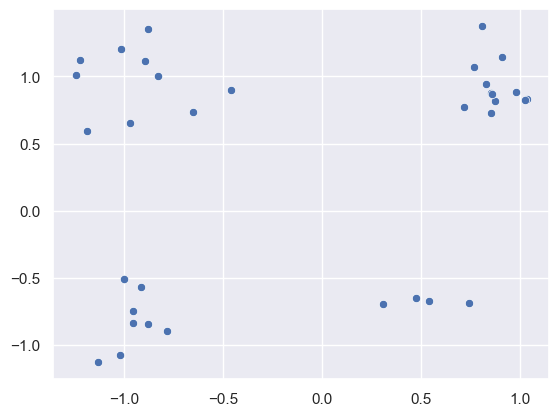

In [5]:
X = np.load("X.npy")
sns.scatterplot(x=X[:,1], y=X[:,0])

## Question 1.1 - Euclidean Distance

Implement the following function that takes in the `centroid` (a $2 \times 1$ numpy array) and a particular `datapoint` (a $2 \times 1$ numpy array). It then returns the computed euclidean distance - as per the lecture notes.

In [6]:
# STUDENT ANSWER
def eucl_distance(centroid, datapoint):
    difference=centroid-datapoint
    insideSqrt= difference[0]**2+difference[1]**2
    distance = np.sqrt(insideSqrt)
    return distance

#### Test Case

In [7]:
dummy_centroid = np.array([0, 0])
dummy_datapoint = np.array([0.8, 1])

import math
correct_answer = math.dist(dummy_centroid, dummy_datapoint)
student_answer = eucl_distance(dummy_centroid, dummy_datapoint)

# Check if euclidean distance calc is 'close' to correct answer and within desired tolerance 
if abs(correct_answer - student_answer) > 0.01:
    print(f"INCORRECT ANSWER: Correct output = {correct_answer}, while eucl_distance gave eucl_distance({dummy_centroid}, {dummy_datapoint}) = {eucl_distance(dummy_centroid, dummy_datapoint)}")

print(f"eucl_distance({dummy_centroid}, {dummy_datapoint}) = {eucl_distance(dummy_centroid, dummy_datapoint)}")

eucl_distance([0 0], [0.8 1. ]) = 1.2806248474865698


## Question 1.2 - K Means Algorithm

Implement the `k_means` function which takes in `data`, i.e. `X` and `k`. It must perform K-means clustering on this data. It should return `cluster_assignments`, `history`.

- `cluster_assignments` is a dataframe denoting the final cluster assignments. It must have the columns `x_0`, `x_1` and `centroid`. `x_0` corresponds to `X[:, 0]`, `x_1` corresponds to `X[:, 1]` and `centroid` is a columns of label denoting which centroid the associated datapoint was allocated to.
- `history` is a list containing the cluster assignments for each iteration and will be used for visualisations. Each value in this list should be a pandas dataframe of the same form as `cluster_assignments`.
    - Note: `history[0]` should correspond to cluster assignments after the first iteration of K-means

Note that your implementation will be marked based off `cluster_assignments` **and** `history`. 

In [15]:
# STUDENT ANSWER
def k_means(data, k):
    cluster_assignments = pd.DataFrame({
        'x_0': data[:, 0],
        'x_1': data[:, 1],
        'cluster': np.zeros(len(data))   
    })
    history = []
    
    
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    while True:
        
        for i in range(len(data)):
            distances = [eucl_distance(centroid, data[i]) for centroid in centroids]
            cluster_assignments.at[i, 'cluster'] = np.argmin(distances)
        
        
        history.append(cluster_assignments.copy())
        
        
        new_centroids = []
        for cluster in range(k):
            cluster_points = data[cluster_assignments['cluster'] == cluster]
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                new_centroids.append(centroids[cluster])  
        
        
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = np.array(new_centroids)
    
    return cluster_assignments, history

#### Visualise

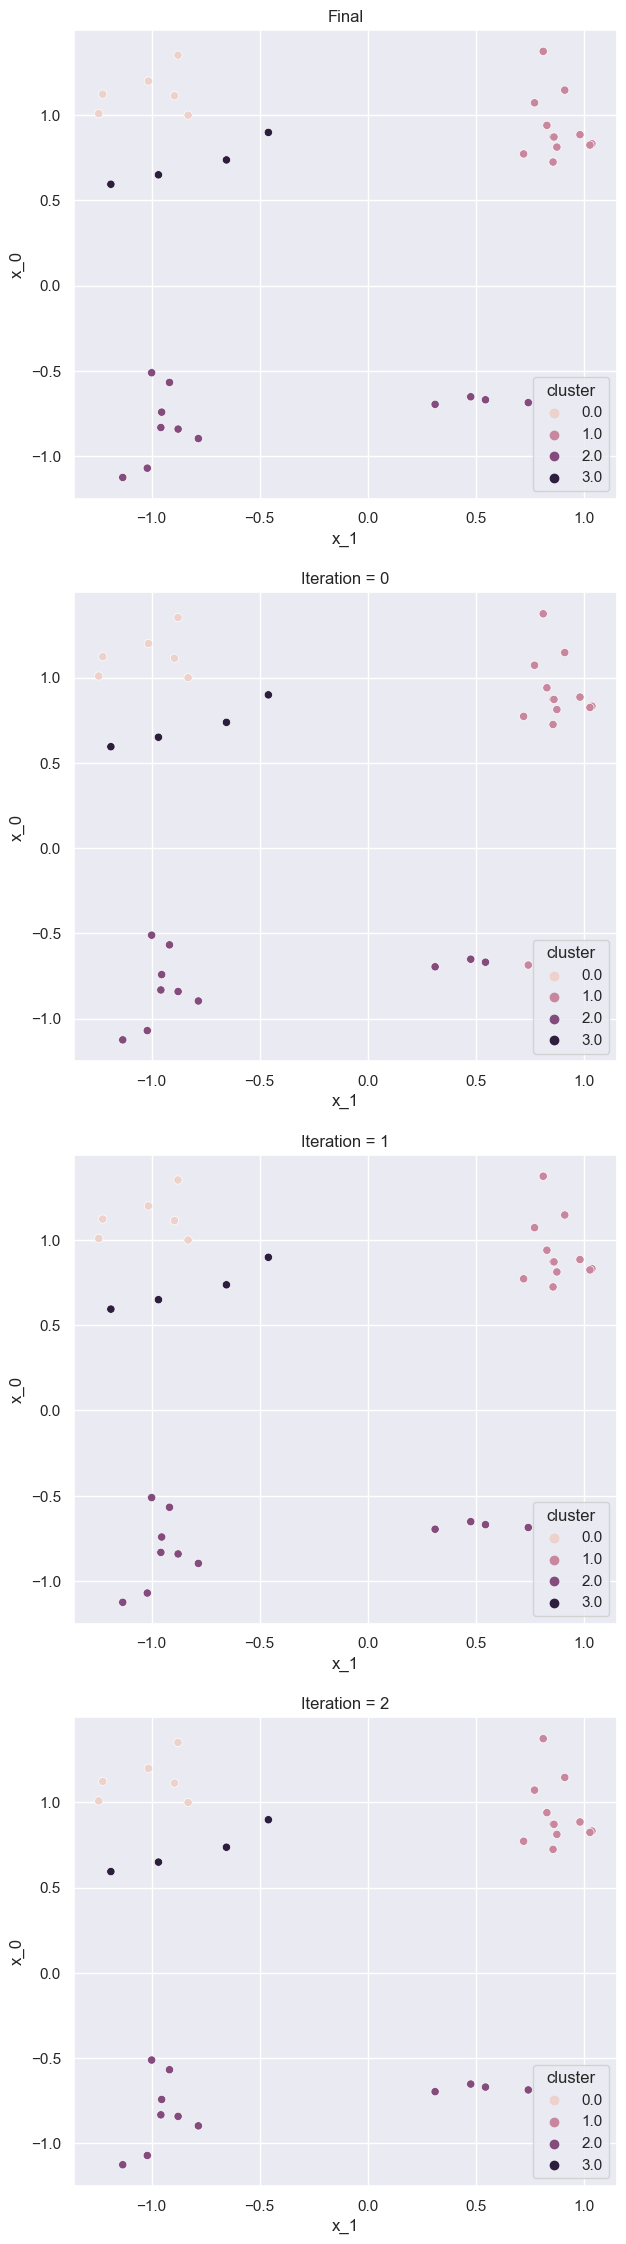

In [14]:
student_ca, student_hist = k_means(X, 4)

n_plots = len(student_hist) + 1
fig, axs = plt.subplots(n_plots, figsize=(7, 7*n_plots))

axs[0].set_title("Final")
sns.scatterplot(student_ca, x="x_1", y="x_0", hue="cluster", ax=axs[0])
for i, curr_df in enumerate(student_hist):
    axs[i+1].set_title(f"Iteration = {i}")
    sns.scatterplot(curr_df, x="x_1", y="x_0", hue="cluster", ax=axs[i+1])


## Question 1.3 - Objective Function
Implement `objective_function` which returns the sum of squared distances of each point to its assigned mean. 

In [ ]:
def objective_function(cluster_assignments):
    objective_value = ...

    return objective_value

#### Evaluate

In [ ]:
student_ca, student_hist = k_means(X, 4)
print(f"Sum of squared distances for k-means cluster assignment: {objective_function(student_ca)}")

## Question 1.4 - Elbow Method for Estimating Best K
Run the k-means algorithm on the data `X` for various values of `K` and plot the associated objection function value for each of the final computed assignments. The x-axis should correspond to `K` and the y-axis should correspond to the associated value of the objective function.

In [ ]:
# STUDENT ANSWER

Based off your prior answer, according to the elbow method heuristic which is the best K value for this dataset?

**TODO:** Edit this markdown cell to provide your answer